In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.data_transformers.disable_max_rows()
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
# What are the places that people most frequently overdose (residences, motels, parks, streets)? 
# How does Connecticut’s prescription tendencies compare to the national average?
# How many actually die the hospital? How many don't reach the hospital?
# How to deal with cocktail of drugs data?

In [4]:
df = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2018.csv")

In [5]:
df.head()

ID                    Date      DateType   Age     Sex          Race  \
0  14-0273  06/28/2014 12:00:00 AM  DateReported   NaN     NaN           NaN   
1  13-0102  03/21/2013 12:00:00 AM   DateofDeath  48.0    Male         Black   
2  16-0165  03/13/2016 12:00:00 AM   DateofDeath  30.0  Female         White   
3  16-0208  03/31/2016 12:00:00 AM   DateofDeath  23.0    Male         White   
4  13-0052  02/13/2013 12:00:00 AM   DateofDeath  22.0    Male  Asian, Other   

  ResidenceCity ResidenceCounty ResidenceState  DeathCity  ... Tramad  \
0           NaN             NaN            NaN        NaN  ...    NaN   
1       NORWALK             NaN            NaN    NORWALK  ...    NaN   
2    SANDY HOOK       FAIRFIELD             CT    DANBURY  ...    NaN   
3           RYE     WESTCHESTER             NY  GREENWICH  ...    NaN   
4      FLUSHING          QUEENS            NaN  GREENWICH  ...    NaN   

  Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid MannerofDeath  \
0                NaN           NaN   NaN       NaN       NaN      Accident   
1                NaN           NaN   NaN       NaN       NaN      Accident   
2                NaN           NaN   NaN       NaN         Y      Accident   
3                NaN           NaN   NaN       NaN         Y      Accident   
4                NaN           NaN   NaN       NaN       NaN      Accident   

                             DeathCityGeo  \
0             CT\n(41.575155, -72.738288)   
1     Norwalk, CT\n(41.11805, -73.412906)   
2    Danbury, CT\n(41.393666, -73.451539)   
3  Greenwich, CT\n(41.026526, -73.628549)   
4  Greenwich, CT\n(41.026526, -73.628549)   

                          ResidenceCityGeo                InjuryCityGeo  
0              CT\n(41.575155, -72.738288)  CT\n(41.575155, -72.738288)  
1      NORWALK, CT\n(41.11805, -73.412906)  CT\n(41.575155, -72.738288)  
2  SANDY HOOK, CT\n(41.419998, -73.282501)                          NaN  
3                                      NaN                          NaN  
4                                      NaN  CT\n(41.575155, -72.738288)  

[5 rows x 41 columns]

In [6]:
df = df.drop(['DateType', 'ResidenceCounty', 'ResidenceState', 'DeathCounty', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'OtherSignifican', 'MannerofDeath'], axis=1)

In [7]:
df.head()

ID                    Date   Age     Sex          Race ResidenceCity  \
0  14-0273  06/28/2014 12:00:00 AM   NaN     NaN           NaN           NaN   
1  13-0102  03/21/2013 12:00:00 AM  48.0    Male         Black       NORWALK   
2  16-0165  03/13/2016 12:00:00 AM  30.0  Female         White    SANDY HOOK   
3  16-0208  03/31/2016 12:00:00 AM  23.0    Male         White           RYE   
4  13-0052  02/13/2013 12:00:00 AM  22.0    Male  Asian, Other      FLUSHING   

   DeathCity  Location LocationifOther     DescriptionofInjury  ... Amphet  \
0        NaN       NaN             NaN               substance  ...    NaN   
1    NORWALK  Hospital             NaN                     NaN  ...    NaN   
2    DANBURY  Hospital             NaN         Substance Abuse  ...    NaN   
3  GREENWICH  Hospital             NaN         substance abuse  ...    NaN   
4  GREENWICH  Hospital             NaN  Transdermal Absorption  ...    NaN   

  Tramad Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid  \
0    NaN                NaN           NaN   NaN       NaN       NaN   
1    NaN                NaN           NaN   NaN       NaN       NaN   
2    NaN                NaN           NaN   NaN       NaN         Y   
3    NaN                NaN           NaN   NaN       NaN         Y   
4    NaN                NaN           NaN   NaN       NaN       NaN   

                             DeathCityGeo  \
0             CT\n(41.575155, -72.738288)   
1     Norwalk, CT\n(41.11805, -73.412906)   
2    Danbury, CT\n(41.393666, -73.451539)   
3  Greenwich, CT\n(41.026526, -73.628549)   
4  Greenwich, CT\n(41.026526, -73.628549)   

                          ResidenceCityGeo                InjuryCityGeo  
0              CT\n(41.575155, -72.738288)  CT\n(41.575155, -72.738288)  
1      NORWALK, CT\n(41.11805, -73.412906)  CT\n(41.575155, -72.738288)  
2  SANDY HOOK, CT\n(41.419998, -73.282501)                          NaN  
3                                      NaN                          NaN  
4                                      NaN  CT\n(41.575155, -72.738288)  

[5 rows x 32 columns]

In [8]:
df.Date = df.Date.replace(r'\d\d/\d\d/','', regex=True)

In [9]:
df.Date =df.Date.replace(r'\d\d:.*', '', regex=True)

In [10]:
df_age = pd.DataFrame(df.groupby('Date').Age.value_counts())

In [11]:
df_age = pd.DataFrame(df.groupby('Date').Age.value_counts())

In [12]:
df_age=df_age.reset_index(level='Date')

In [13]:
df_age=df_age.rename(columns={'Age': 'agecount'})

In [14]:
df_age = df_age.reset_index()

In [15]:
df_age.head()

Age   Date  agecount
0  31.0  2012         15
1  45.0  2012         15
2  29.0  2012         13
3  30.0  2012         12
4  48.0  2012         12

In [17]:
df.Date = df.Date.astype(str)

In [18]:
df.Date = df.Date.str.strip()

In [19]:
df['Heroin'] = df.Heroin.replace({'Y': 'Heroin'})

In [20]:
df['Cocaine'] = df.Cocaine.replace({'Y': 'Cocaine'})

In [21]:
df['Fentanyl'] = df.Fentanyl.replace({'Y': 'Fentanyl'})

In [22]:
df['Ethanol'] = df.Ethanol.replace({'Y': 'Ethanol'})

In [23]:
df['Hydrocodone'] = df.Hydrocodone.replace({'Y': 'Hydrocodone'})

In [24]:
df['Benzodiazepine'] = df.Benzodiazepine.replace({'Y': 'Benzodiazepine'})

In [25]:
df['Methadone'] = df.Methadone.replace({'Y': 'Methadone'})

In [26]:
df.head()

ID  Date   Age     Sex          Race ResidenceCity  DeathCity  \
0  14-0273  2014   NaN     NaN           NaN           NaN        NaN   
1  13-0102  2013  48.0    Male         Black       NORWALK    NORWALK   
2  16-0165  2016  30.0  Female         White    SANDY HOOK    DANBURY   
3  16-0208  2016  23.0    Male         White           RYE  GREENWICH   
4  13-0052  2013  22.0    Male  Asian, Other      FLUSHING  GREENWICH   

   Location LocationifOther     DescriptionofInjury  ... Amphet Tramad  \
0       NaN             NaN               substance  ...    NaN    NaN   
1  Hospital             NaN                     NaN  ...    NaN    NaN   
2  Hospital             NaN         Substance Abuse  ...    NaN    NaN   
3  Hospital             NaN         substance abuse  ...    NaN    NaN   
4  Hospital             NaN  Transdermal Absorption  ...    NaN    NaN   

  Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid  \
0                NaN           NaN   NaN       NaN       NaN   
1                NaN           NaN   NaN       NaN       NaN   
2                NaN           NaN   NaN       NaN         Y   
3                NaN           NaN   NaN       NaN         Y   
4                NaN           NaN   NaN       NaN       NaN   

                             DeathCityGeo  \
0             CT\n(41.575155, -72.738288)   
1     Norwalk, CT\n(41.11805, -73.412906)   
2    Danbury, CT\n(41.393666, -73.451539)   
3  Greenwich, CT\n(41.026526, -73.628549)   
4  Greenwich, CT\n(41.026526, -73.628549)   

                          ResidenceCityGeo                InjuryCityGeo  
0              CT\n(41.575155, -72.738288)  CT\n(41.575155, -72.738288)  
1      NORWALK, CT\n(41.11805, -73.412906)  CT\n(41.575155, -72.738288)  
2  SANDY HOOK, CT\n(41.419998, -73.282501)                          NaN  
3                                      NaN                          NaN  
4                                      NaN  CT\n(41.575155, -72.738288)  

[5 rows x 32 columns]

In [27]:
df['Race'] = df.Race.replace({
    'Asian Indian': 'Asian',
    'Asian, Other': 'Asian',
    'Chinese': 'Asian',
    'Hawaiian': 'Other',
    'Unknown': 'Other',
    'Hispanic, Black': 'Hispanic',
    'Hispanic, White': 'Hispanic',
    'Native American, Other': 'Native American',
})

In [75]:
df.InjuryPlace.value_counts().head(30)

Residence                           3601
Other                                269
Residential Building                 241
Hotel or Motel                       227
Unknown                              176
In Vehicle                            57
Automobile                            46
Other, Other Outdoor Area             42
Parking Lot                           41
Halfway House                         33
House                                 25
Apartment                             19
Restaurant                            19
Other indoor Area                     17
Apartment House                       12
Other, Public Buildings               11
Other (unknown)                       10
Nursing Home                          10
Driveway                               9
Public Park                            9
Sidewalk                               8
Forest, Wooded Area                    8
Street                                 8
Porch                                  7
Alleyway        

In [80]:
df['InjuryPlace'] = df.InjuryPlace.replace({
    'Automobile': 'In Vehicle',
    'Other, Other Outdoor Area': 'Outdoor Area',
    'Other, Public Buildings': 'Public Buildings',
    'Other (unknown)': 'Unknown',
    'Other, Park or Recreational Area': 'Park or Recreational Area',
})

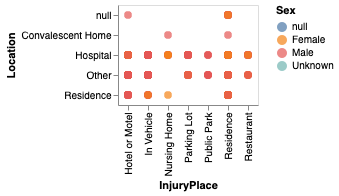

In [145]:
source = hi
hi = df[df.InjuryPlace.isin(['Residence', 'Hotel or Motel', 'In Vehicle', 'Parking Lot', 'Restaurant', "Nursing Home", 'Public Park'])]
alt.Chart(source).mark_circle(size=60).encode(
    x='InjuryPlace',
    y='Location',
    color='Sex',
    tooltip=['Date', 'Age', 'InjuryPlace']
).interactive()

In [82]:
df.head()

ID  Date   Age     Sex   Race ResidenceCity  DeathCity  Location  \
0  14-0273  2014   NaN     NaN    NaN           NaN        NaN       NaN   
1  13-0102  2013  48.0    Male  Black       NORWALK    NORWALK  Hospital   
2  16-0165  2016  30.0  Female  White    SANDY HOOK    DANBURY  Hospital   
3  16-0208  2016  23.0    Male  White           RYE  GREENWICH  Hospital   
4  13-0052  2013  22.0    Male  Asian      FLUSHING  GREENWICH  Hospital   

  LocationifOther     DescriptionofInjury  ... Amphet Tramad  \
0             NaN               substance  ...    NaN    NaN   
1             NaN                     NaN  ...    NaN    NaN   
2             NaN         Substance Abuse  ...    NaN    NaN   
3             NaN         substance abuse  ...    NaN    NaN   
4             NaN  Transdermal Absorption  ...    NaN    NaN   

  Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid  \
0                NaN           NaN   NaN       NaN       NaN   
1                NaN           NaN   NaN       NaN       NaN   
2                NaN           NaN   NaN       NaN         Y   
3                NaN           NaN   NaN       NaN         Y   
4                NaN           NaN   NaN       NaN       NaN   

                             DeathCityGeo  \
0             CT\n(41.575155, -72.738288)   
1     Norwalk, CT\n(41.11805, -73.412906)   
2    Danbury, CT\n(41.393666, -73.451539)   
3  Greenwich, CT\n(41.026526, -73.628549)   
4  Greenwich, CT\n(41.026526, -73.628549)   

                          ResidenceCityGeo                InjuryCityGeo  
0              CT\n(41.575155, -72.738288)  CT\n(41.575155, -72.738288)  
1      NORWALK, CT\n(41.11805, -73.412906)  CT\n(41.575155, -72.738288)  
2  SANDY HOOK, CT\n(41.419998, -73.282501)                          NaN  
3                                      NaN                          NaN  
4                                      NaN  CT\n(41.575155, -72.738288)  

[5 rows x 32 columns]

In [83]:
df.InjuryPlace.value_counts().head(30)

Residence                         3601
Other                              269
Residential Building               241
Hotel or Motel                     227
Unknown                            186
In Vehicle                         103
Outdoor Area                        42
Parking Lot                         41
Halfway House                       33
House                               25
Apartment                           19
Restaurant                          19
Other indoor Area                   17
Apartment House                     12
Public Buildings                    11
Nursing Home                        10
Driveway                             9
Public Park                          9
Sidewalk                             8
Forest, Wooded Area                  8
Street                               8
Park or Recreational Area            7
Alleyway                             7
Porch                                7
Building                             6
Hospital or Emergency Roo

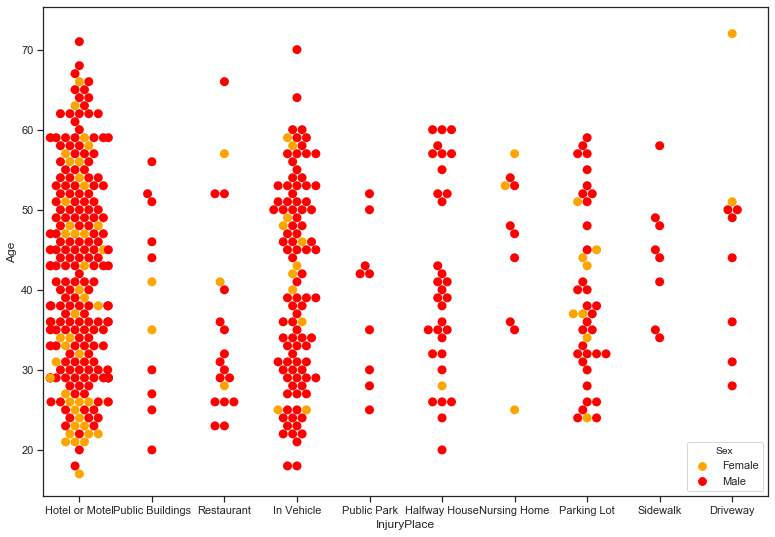

In [131]:
hi = df[df.InjuryPlace.isin(['Hotel or Motel', 'In Vehicle', 'Parking Lot', 'Halfway House', 'Restaurant', 'Public Buildings', "Nursing Home", 'Driveway', 'Public Park', 'Sidewalk'])]

fig, ax = plt.subplots(figsize=(13,9))
chart = sns.swarmplot(ax=ax, x="InjuryPlace", y="Age", hue="Sex",
              palette=["orange", "red", "b", "g", "grey"], size = 9, data=hi)

plt.savefig("chart2.pdf")


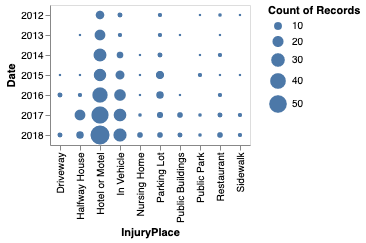

In [114]:
hi = df[df.InjuryPlace.isin(['Hotel or Motel', 'In Vehicle', 'Parking Lot', 'Halfway House', 'Restaurant', 'Public Buildings', "Nursing Home", 'Driveway', 'Public Park', 'Sidewalk'])]

source = hi

alt.Chart(source).mark_circle().encode(
    x='InjuryPlace',
    y='Date',
    size='count()'
)

# chart.save('chart.svg')


In [146]:
df2 = pd.read_csv("totaldeathsbyrace.csv")

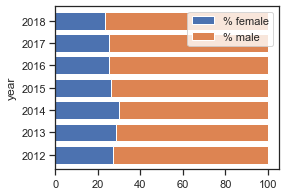

In [161]:
df2.plot(x='year', 
         y=['% female', '% male'], 
         kind='barh', 
         figsize = (4,3),
         width=0.8,
         stacked=True)

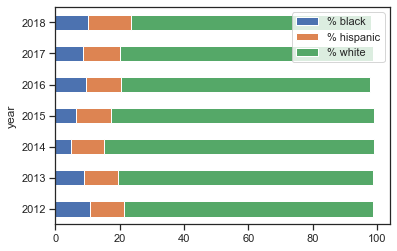

In [154]:
df2.plot(x='year', 
         y=['% black', 
            '% hispanic', 
            '% white'], 
         kind='barh',
         
         stacked=True)